In [1]:
import random
import numpy as np
from math import erfc
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def wiener(n, dt, t_init=0, w_init=0.0):
    """Returns one realization of a Wiener process with n steps of length dt.
    The time and Wiener series can be initialized using t_init and w_init respectively."""
    n+=1
    t_series = np.arange(t_init,n*dt,dt)
    h = t_series[1]-t_series[0]
    z = np.random.normal(0.0,1.0,n)
    dw = np.sqrt(h)*z
    dw[0] = w_init
    w_series = dw.cumsum()
    return t_series, w_series

def gaussian(x, mu, sig):
    return np.exp(-(x-mu)**2/2/sig**2)/np.sqrt(2*np.pi)/sig

In [3]:
def get_fds(w,lim=None):
    '''returns a finite difference series based on the input data
    
    w = input data series
    lim = returned differences are between +/-lim.'''
    return [w[i+1]-w[i] for i in range(len(w)-1) if lim==None or abs(w[i+1]-w[i])<lim]

In [4]:
def raise_res(T, W, c, mu=0, sigma=1):
    '''Increase the resolution of a wiener series by a factor of c.
    
    T = the given Time series.
    W = the associated Wiener series.
    c = Scaling factor (integer greater than 1).
    mu = Mean of W's underlying normal distribution.
    sigma = Standard deviation of W's underlying normal distribution.
    '''
    dT = T[1]-T[0]
    dt = float(T[1]-T[0])/c
    t_series = []
    w_series = []
    for i in range(len(T)-1):
        t = T[i]
        w_t = W[i]
        t_next = T[i+1]
        w_next = W[i+1]
        t_series.append(t)
        w_series.append(w_t)
        for j in range(c-1):
            t+=dt
            dW = (w_next-w_t)
            if np.sqrt(2)*np.sqrt(t_next-t)*sigma*erfc(-2*random.random())<abs(dW):
                w_t+=np.abs(random.gauss(0,np.sqrt(dt)*sigma))*float(dW)/abs(dW)
            else:
                w_t+=random.gauss(0,np.sqrt(dt)*sigma)
            t_series.append(t)
            w_series.append(w_t)
    t_series.append(T[-1])
    w_series.append(W[-1])
    return t_series,w_series

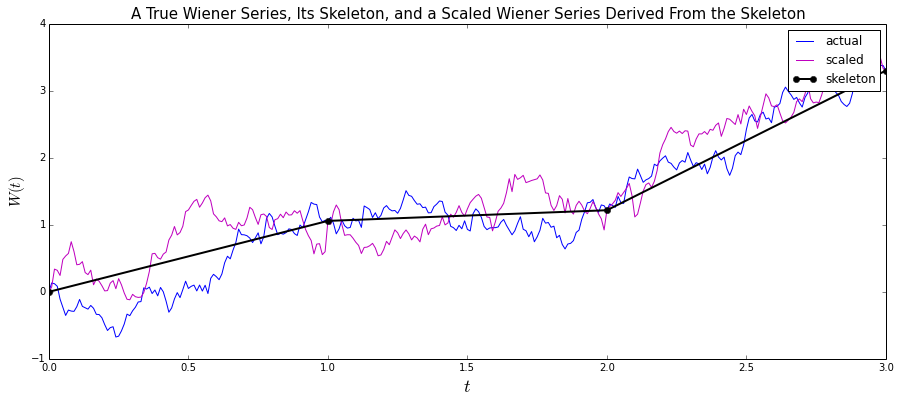

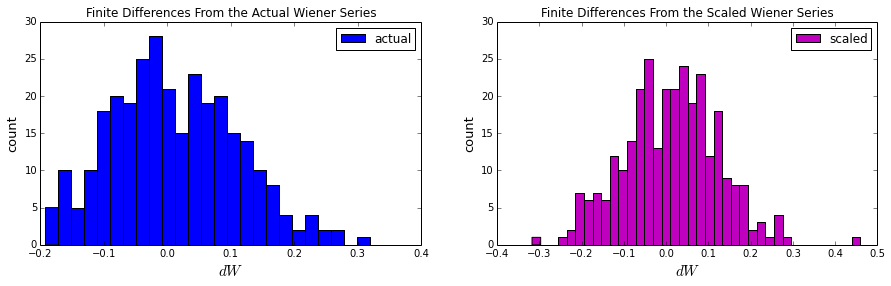

In [5]:
c=100
num = 3
dt = 1.
T1,W1 = wiener(num*c,dt/c)
T2 = [T1[i] for i in range(len(T1)) if i%c==0]
W2 = [W1[i] for i in range(len(W1)) if i%c==0]
Tn,Wn = raise_res(T2,W2,c)

plt.figure(figsize=(15,6))
plt.title('A True Wiener Series, Its Skeleton, and a Scaled Wiener Series Derived From the Skeleton',fontsize=15)
plt.plot(T1,W1,label='actual',color='b')
plt.plot(Tn,Wn,label='scaled',color='m')
plt.plot(T2,W2,label='skeleton',color='k',linewidth=2,marker='o',markersize=6)
plt.ylabel('$W(t)$',fontsize=15)
plt.xlabel('$t$',fontsize=18)
plt.legend()
plt.show()

dW1 = get_fds(W1)
bnum1 = (max(dW1)-min(dW1))*50
dWn = get_fds(Wn)
bnumn = (max(dWn)-min(dWn))*50
plt.figure(figsize=(15,4))
ax1 = plt.subplot(121)
ax1.set_title('Finite Differences From the Actual Wiener Series')
ax1.set_ylabel('count',fontsize=13)
ax1.set_xlabel('$dW$',fontsize=15)
plt.hist(dW1,bnum1,label='actual')
plt.legend()
ax2 = plt.subplot(122,sharey=ax1)
ax2.set_title('Finite Differences From the Scaled Wiener Series')
ax2.set_ylabel('count',fontsize=13)
ax2.set_xlabel('$dW$',fontsize=15)
plt.hist(dWn,bnumn,label='scaled',color='m')
plt.legend()
plt.show()

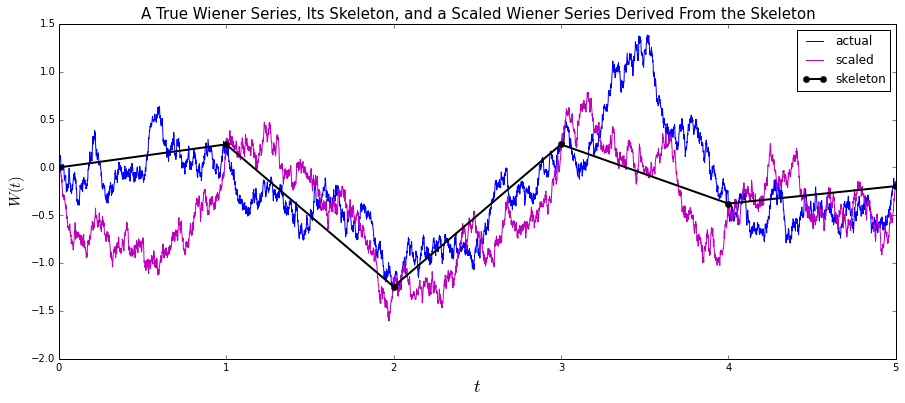

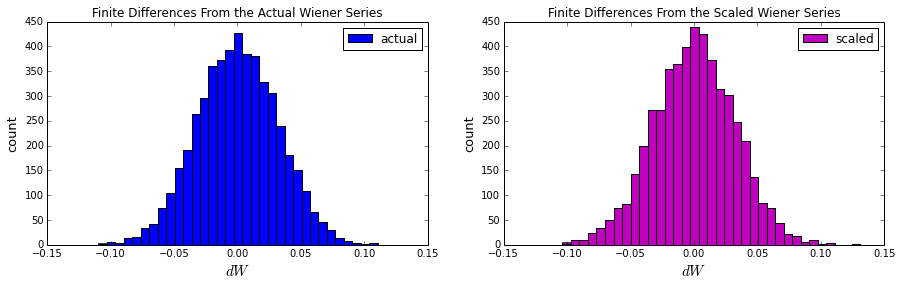

In [6]:
c=1000
num = 5
dt = 1.
T1,W1 = wiener(num*c,dt/c)
T2 = [T1[i] for i in range(len(T1)) if i%c==0]
W2 = [W1[i] for i in range(len(W1)) if i%c==0]
Tn,Wn = raise_res(T2,W2,c)

plt.figure(figsize=(15,6))
plt.title('A True Wiener Series, Its Skeleton, and a Scaled Wiener Series Derived From the Skeleton',fontsize=15)
plt.plot(T1,W1,label='actual',color='b')
plt.plot(Tn,Wn,label='scaled',color='m')
plt.plot(T2,W2,label='skeleton',color='k',linewidth=2,marker='o',markersize=6)
plt.ylabel('$W(t)$',fontsize=15)
plt.xlabel('$t$',fontsize=18)
plt.legend()
plt.show()

dW1 = get_fds(W1)
bnum1 = (max(dW1)-min(dW1))*150
dWn = get_fds(Wn)
bnumn = (max(dWn)-min(dWn))*150
plt.figure(figsize=(15,4))
ax1 = plt.subplot(121)
ax1.set_title('Finite Differences From the Actual Wiener Series')
ax1.set_ylabel('count',fontsize=13)
ax1.set_xlabel('$dW$',fontsize=15)
plt.hist(dW1,bnum1,label='actual')
plt.legend()
ax2 = plt.subplot(122,sharey=ax1)
ax2.set_title('Finite Differences From the Scaled Wiener Series')
ax2.set_ylabel('count',fontsize=13)
ax2.set_xlabel('$dW$',fontsize=15)
plt.hist(dWn,bnumn,label='scaled',color='m')
plt.legend()
plt.show()

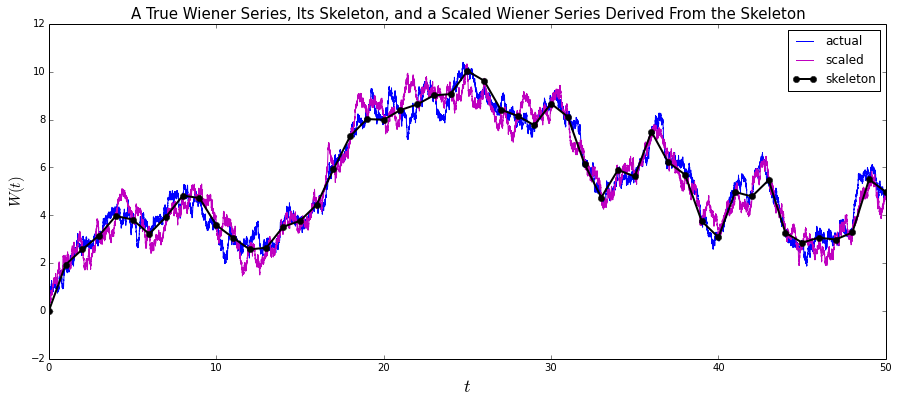

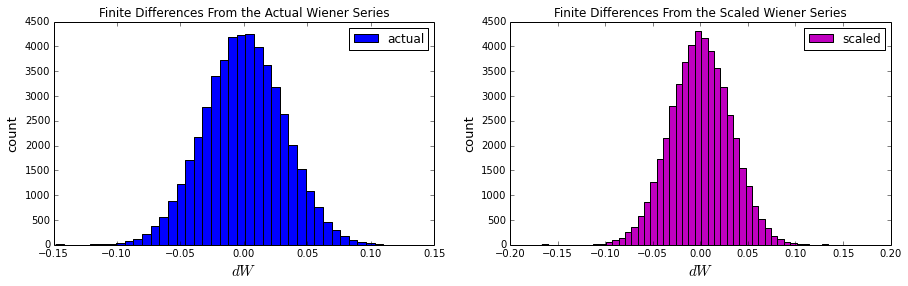

In [7]:
c=1000
num = 50
dt = 1.
T1,W1 = wiener(num*c,dt/c)
T2 = [T1[i] for i in range(len(T1)) if i%c==0]
W2 = [W1[i] for i in range(len(W1)) if i%c==0]
Tn,Wn = raise_res(T2,W2,c)

plt.figure(figsize=(15,6))
plt.title('A True Wiener Series, Its Skeleton, and a Scaled Wiener Series Derived From the Skeleton',fontsize=15)
plt.plot(T1,W1,label='actual',color='b')
plt.plot(Tn,Wn,label='scaled',color='m')
plt.plot(T2,W2,label='skeleton',color='k',linewidth=2,marker='o',markersize=6)
plt.ylabel('$W(t)$',fontsize=15)
plt.xlabel('$t$',fontsize=18)
plt.legend()
plt.show()

dW1 = get_fds(W1)
bnum1 = (max(dW1)-min(dW1))*150
dWn = get_fds(Wn)
bnumn = (max(dWn)-min(dWn))*150
plt.figure(figsize=(15,4))
ax1 = plt.subplot(121)
ax1.set_title('Finite Differences From the Actual Wiener Series')
ax1.set_ylabel('count',fontsize=13)
ax1.set_xlabel('$dW$',fontsize=15)
plt.hist(dW1,bnum1,label='actual')
plt.legend()
ax2 = plt.subplot(122,sharey=ax1)
ax2.set_title('Finite Differences From the Scaled Wiener Series')
ax2.set_ylabel('count',fontsize=13)
ax2.set_xlabel('$dW$',fontsize=15)
plt.hist(dWn,bnumn,label='scaled',color='m')
plt.legend()
plt.show()

In [8]:
from brownian.wiener import raise_res

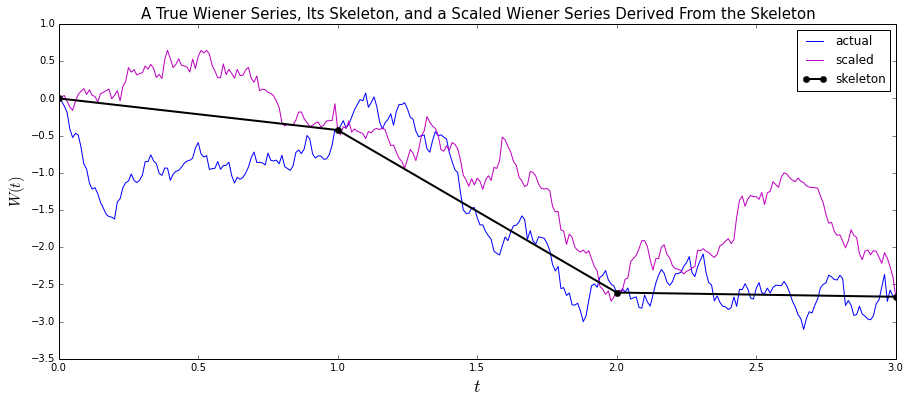

In [13]:
c=100
num = 3
dt = 1.
T1,W1 = wiener(num*c,dt/c)
T2 = [T1[i] for i in range(len(T1)) if i%c==0]
W2 = [W1[i] for i in range(len(W1)) if i%c==0]
Tn,Wn = raise_res(T2,W2,c)

plt.figure(figsize=(15,6))
plt.title('A True Wiener Series, Its Skeleton, and a Scaled Wiener Series Derived From the Skeleton',fontsize=15)
plt.plot(T1,W1,label='actual',color='b')
plt.plot(Tn,Wn,label='scaled',color='m')
plt.plot(T2,W2,label='skeleton',color='k',linewidth=2,marker='o',markersize=6)
plt.ylabel('$W(t)$',fontsize=15)
plt.xlabel('$t$',fontsize=18)
plt.legend()
plt.show()

In [10]:
def autocorr(x):
    result = np.correlate(x, x, mode='full')
    return result[result.size/2:]

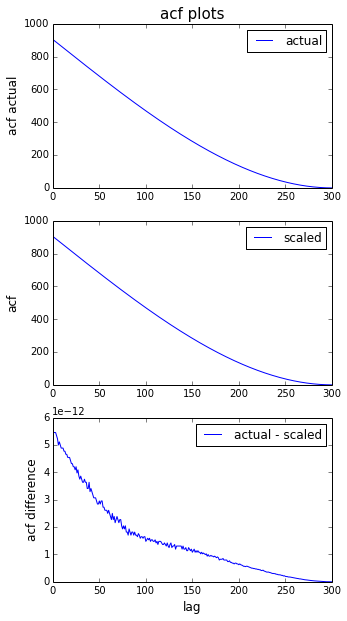

In [11]:
a_T1 = autocorr(T1)
a_Tn = autocorr(Tn)
a_1ndif = a_T1-a_Tn

plt.figure(figsize=(5,10))
ax1 = plt.subplot(311)
ax1.set_title('acf plots',fontsize=15)
ax1.set_ylabel('acf actual',fontsize=12)
plt.plot(range(len(a_T1)),a_T1,label='actual')
plt.legend()

ax2 = plt.subplot(312,sharex=ax1)
ax2.set_ylabel('acf',fontsize=12)
plt.plot(range(len(a_Tn)),a_Tn,label='scaled')
plt.legend()

ax3 = plt.subplot(313,sharex=ax1)
ax3.set_ylabel('acf difference',fontsize=12)
ax3.set_xlabel('lag',fontsize=12)
plt.plot(range(len(a_1ndif)),a_1ndif,label='actual - scaled')
plt.legend()
plt.show()